## Analyzing the Data 

In [11]:
# Imports
import sqlite3
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Statistical Testing
Conduct hypothesis testing and use linear regression to make recommendations for the new movie studio.

## 4.1 Define Business Goals

- Use statistical analysis to find insights that can be transformed into concrete recommendations for movie production.
- Example goals could be:
  - Identify genres with the highest ROI.
  - Analyze how budget affects box office revenue.

## 4.2 Conduct Statistical Test

- Use hypothesis testing (e.g., t-tests or ANOVA) to determine if certain variables (e.g., genre, budget) significantly impact movie success.


In [12]:
#Test whether genre has a significant effect on ROI using a t-test
merged_data = pd.read_pickle("merged_data.pkl")
merged_data

,movie_id,primary_title,genres,individual_genre,runtime_minutes,title,studio,domestic_gross,foreign_gross,year,averagerating,numvotes,director_id,director_name,total_gross
0,tt0315642,Wazir,"Action,Crime,Drama",Action,103.0,Wazir,Relbig.,1100000.0,0.0,2016,7.1,15378.0,nm2349060,Bejoy Nambiar,1100000.0
1,tt0315642,Wazir,"Action,Crime,Drama",Action,103.0,Wazir,Relbig.,1100000.0,0.0,2016,7.1,15378.0,nm2349060,Bejoy Nambiar,1100000.0
2,tt0315642,Wazir,"Action,Crime,Drama",Action,103.0,Wazir,Relbig.,1100000.0,0.0,2016,7.1,15378.0,nm2349060,Bejoy Nambiar,1100000.0
3,tt0315642,Wazir,"Action,Crime,Drama",Action,103.0,Wazir,Relbig.,1100000.0,0.0,2016,7.1,15378.0,nm2349060,Bejoy Nambiar,1100000.0
4,tt0315642,Wazir,"Action,Crime,Drama",Action,103.0,Wazir,Relbig.,1100000.0,0.0,2016,7.1,15378.0,nm2349060,Bejoy Nambiar,1100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20573,tt9078374,Last Letter,"Drama,Romance",Drama,114.0,Last Letter,CL,181000.0,0.0,2018,6.4,322.0,nm0412517,Shunji Iwai,181000.0
20574,tt9078374,Last Letter,"Drama,Romance",Romance,114.0,Last Letter,CL,181000.0,0.0,2018,6.4,322.0,nm0412517,Shunji Iwai,181000.0
20575,tt9078374,Last Letter,"Drama,Romance",Romance,114.0,Last Letter,CL,181000.0,0.0,2018,6.4,322.0,nm0412517,Shunji Iwai,181000.0
20576,tt9151704,Burn the Stage: The Movie,"Documentary,Music",Documentary,84.0,Burn the Stage: The Movie,Trafalgar,4200000.0,16100000.0,2018,8.8,2067.0,nm10201503,Jun-Soo Park,20300000.0


In [13]:
merged_data["total_gross"].value_counts()

total_gross
32000.0       540
32400000.0    260
100000.0      232
2584000.0     152
59300000.0    141
             ... 
57800.0         1
22487000.0      1
7271000.0       1
4841000.0       1
701000.0        1
Name: count, Length: 1944, dtype: int64

In [14]:
# check to see if there are any null values in total_gross
merged_data["total_gross"].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
20573    False
20574    False
20575    False
20576    False
20577    False
Name: total_gross, Length: 20578, dtype: bool

In [15]:
# Getting median total gross reveue for each individual genre
gross_by_genre = merged_data.groupby("individual_genre")[["total_gross"]].median().sort_values("total_gross", ascending=False)
gross_by_genre

,total_gross
individual_genre,
Sci-Fi,286200000.0
Adventure,252200000.0
Animation,214100000.0
Action,88000000.0
Family,59300000.0
Comedy,32400000.0
Fantasy,25100000.0
Sport,14400000.0
Mystery,13147000.0


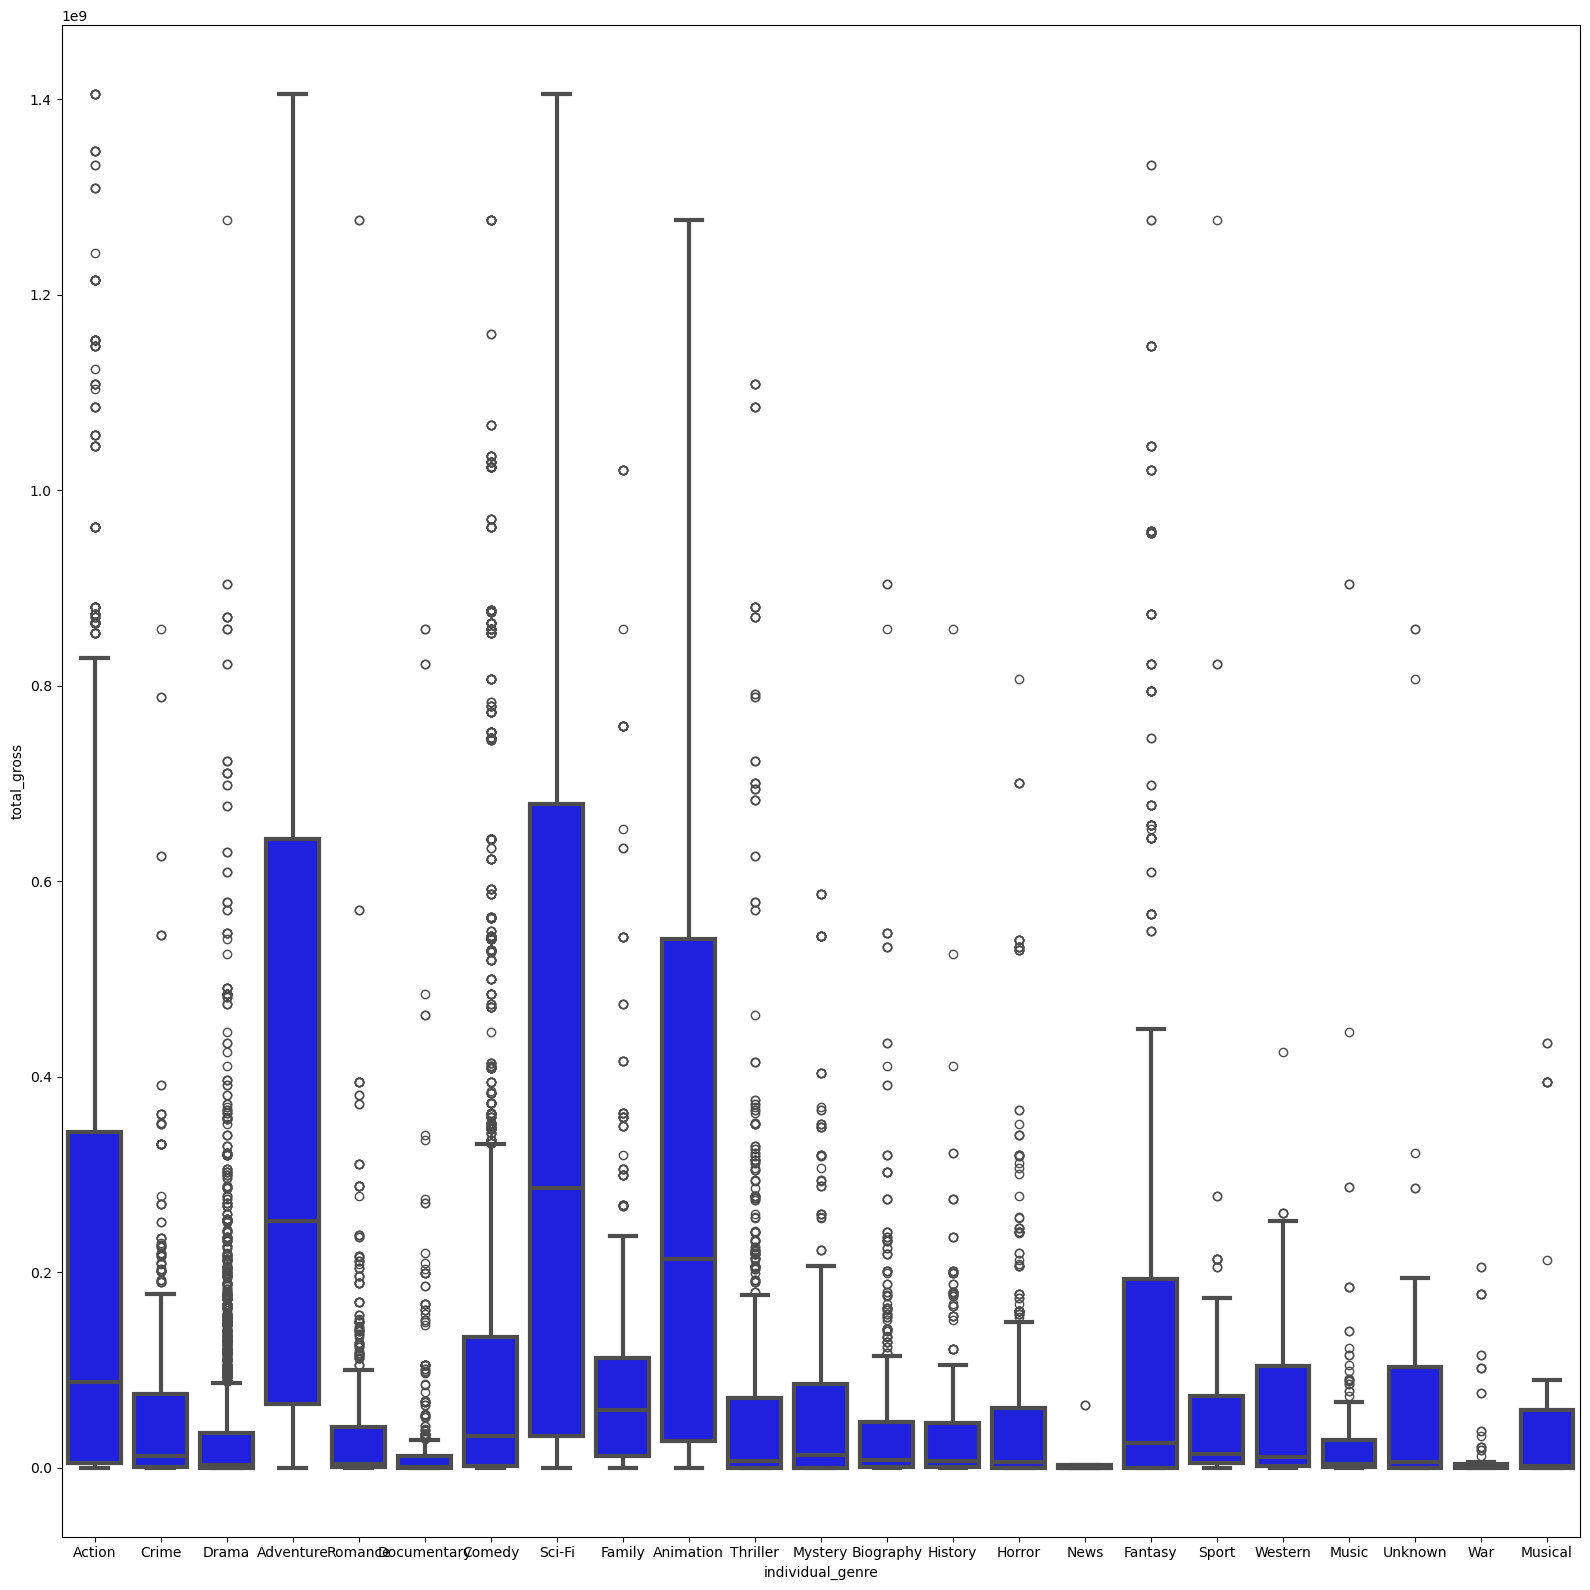

In [16]:
fig, ax = plt.subplots(figsize=(16, 16))

sns.boxplot(
    x="individual_genre",
    y="total_gross",
    data=merged_data,
    ax=ax,
    color="blue",
    linewidth=3
)

plt.tight_layout()

In [17]:
# define our alpha
alpha = 0.01

# get the list of genres in data
genres = list(merged_data["individual_genre"].unique())
genres.remove("Unknown")

# create dictionary of df for each genre
total_gross_data_per_genre = {}
for genre in genres:
    total_gross_data_per_genre[genre] = list(merged_data[merged_data["individual_genre"] == genre]["total_gross"].values)

In [18]:
result = stats.f_oneway(*total_gross_data_per_genre.values())
f_stat, p_value = result

p_value

0.0

In [19]:
# Look at the OLS ANOVA table
formula = "total_gross ~ C(individual_genre)"
anova_sm = ols(formula=formula, data=merged_data).fit()
anova_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_gross   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     255.9
Date:                Mon, 21 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:01:26   Log-Likelihood:            -4.2378e+05
No. Observations:               20578   AIC:                         8.476e+05
Df Residuals:                   20555   BIC:                         8.478e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           2.317e+08   4.75e+06     48.741      0.000    2.22e+08    2.41e+08
C(individual_genre)[T.Adventure]     1.29e+08   6.88e+06     18.752      0.000    1.15e+08    1.42e+08
C(individual_genre)[T.Animation]    8.425e+07    8.5e+06      9.913      0.000    6.76e+07    1.01e+08
C(individual_genre)[T.Biography]   -1.825e+08   9.36e+06    -19.504      0.000   -2.01e+08   -1.64e+08
C(individual_genre)[T.Comedy]      -1.044e+08   5.99e+06    -17.427      0.000   -1.16e+08   -9.26e+07
C(individual_genre)[T.Crime]       -1.752e+08   8.56e+06    -20.465      0.000   -1.92e+08   -1.58e+08
C(individual_genre)[T.Documentary]  -2.07e+08   9.64e+06    -21.464      0.000   -2.26e+08   -1.88e+08
C(individual_genre)[T.Drama]       -1.904e+08   5.77e+06    -33.009      0.000   -2.02e+08   -1.79e+08
C(individual_genre)[T.Family]      -1.188e+08   1.06e+07    -11.255      0.000   -1.39e+08   -9.81e+07
C(individual_genre)[T.Fantasy]     -5.591e+07   9.63e+06     -5.808      0.000   -7.48e+07    -3.7e+07
C(individual_genre)[T.History]     -1.888e+08   1.27e+07    -14.822      0.000   -2.14e+08   -1.64e+08
C(individual_genre)[T.Horror]      -1.779e+08   9.09e+06    -19.571      0.000   -1.96e+08    -1.6e+08
C(individual_genre)[T.Music]       -1.953e+08   1.63e+07    -12.004      0.000   -2.27e+08   -1.63e+08
C(individual_genre)[T.Musical]     -1.562e+08   3.17e+07     -4.924      0.000   -2.18e+08    -9.4e+07
C(individual_genre)[T.Mystery]     -1.623e+08   1.07e+07    -15.148      0.000   -1.83e+08   -1.41e+08
C(individual_genre)[T.News]        -2.183e+08   6.74e+07     -3.237      0.001    -3.5e+08   -8.61e+07
C(individual_genre)[T.Romance]     -1.939e+08   8.12e+06    -23.863      0.000    -2.1e+08   -1.78e+08
C(individual_genre)[T.Sci-Fi]       1.531e+08   1.11e+07     13.793      0.000    1.31e+08    1.75e+08
C(individual_genre)[T.Sport]       -1.626e+08   1.94e+07     -8.382      0.000   -2.01e+08   -1.25e+08
C(individual_genre)[T.Thriller]    -1.545e+08   7.85e+06    -19.669      0.000    -1.7e+08   -1.39e+08
C(individual_genre)[T.Unknown]     -1.325e+08   3.08e+07     -4.307      0.000   -1.93e+08   -7.22e+07
C(individual_genre)[T.War]         -2.113e+08   2.14e+07     -9.878      0.000   -2.53e+08   -1.69e+08
C(individual_genre)[T.Western]     -1.527e+08   3.08e+07     -4.963      0.000   -2.13e+08   -9.24e+07
==============================================================================
Omnibus:                     8525.314   Durbin-Watson:                   0.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40581.978
Skew:                           1.999   Prob(JB):                         0.00
Kurtosis:                       8.599   Cond. No.                         47.7
==========

## 4.3 Answering the Questions

### 1. What genres perform best at the box office?
- To answer this question, we want to identify genres and calculate total box office revenue (both domestic and foreign).


In [22]:
# Group by genre and calculate total box office revenue
box_office_by_genre = merged_data.groupby('genres').agg({
    'domestic_gross': 'sum',
    'foreign_gross': 'sum'
}).reset_index()

# Calculate total gross
box_office_by_genre['total_gross'] = box_office_by_genre['domestic_gross'] + box_office_by_genre['foreign_gross']

# Visualize the total gross by genre
# plt.figure(figsize=(12, 6))
# sns.barplot(x='total_gross', y='genres', data=box_office_by_genre.sort_values('total_gross', ascending=False))
# plt.title('Total Box Office Revenue by Genre')
# plt.xlabel('Total Gross Revenue ($)')
# plt.ylabel('Genres')
# plt.show()

### 2. What factors influence a movie’s success (budget, genre, director, etc.)?
- We are going to use a simple linear regression to examine how budget and genre affect box office revenue.
- Convert categorical variables (e.g., genre) to numerical using one-hot encoding.

In [33]:
# Check data types 
print(merged_data.dtypes)


movie_id             object
primary_title        object
genres               object
individual_genre     object
runtime_minutes     float64
title                object
studio               object
domestic_gross      float64
foreign_gross       float64
year                  int64
averagerating       float64
numvotes            float64
director_id          object
director_name        object
total_gross         float64
dtype: object


In [34]:
# Convert columns to appropriate data types
merged_data['domestic_gross'] = pd.to_numeric(merged_data['domestic_gross'], errors='coerce')
merged_data['foreign_gross'] = pd.to_numeric(merged_data['foreign_gross'], errors='coerce')

In [35]:
# Check for missing values and drop rows with missing values
merged_data.dropna(subset=['domestic_gross', 'foreign_gross'], inplace=True)  

In [38]:
#Since were including categorical variables, we need to use one-hot encoding specifically for genre
merged_data = pd.get_dummies(merged_data, columns=['genres'], drop_first=True)

In [40]:
# Define the dependent variable  (total_gross) and independent variables
X = merged_data[['domestic_gross', 'foreign_gross'] + [col for col in merged_data.columns if 'genre_' in col]]  # Include all genre columns
y = merged_data['total_gross'] 

In [41]:
# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_gross   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.908e+33
Date:                Mon, 21 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:20:21   Log-Likelihood:             2.7146e+05
No. Observations:               20578   AIC:                        -5.429e+05
Df Residuals:                   20575   BIC:                        -5.429e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.529e-07    3.6e-09    -42.

### 3. Which movies have the highest ROI (return on investment)?
- Calculate the ROI for each movie and determine which movies have the highest ROI.
- Visualize the distribution of ROI by genre.

In [31]:
# Sort movies by total gross revenue
high_gross_movies = merged_data.sort_values('total_gross', ascending=False)

# Display the top movies with the highest total gross revenue
print(high_gross_movies[['title', 'total_gross']].head(10))

# Visualize total gross by genre
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='genres', y='total_gross', data=merged_data)
# plt.title('Total Gross Revenue Distribution by Genre')
# plt.xlabel('Genre')
# plt.ylabel('Total Gross Revenue')
# plt.xticks(rotation=45)
# plt.show()


                         title   total_gross
13928  Avengers: Age of Ultron  1.405400e+09
13932  Avengers: Age of Ultron  1.405400e+09
13918  Avengers: Age of Ultron  1.405400e+09
13919  Avengers: Age of Ultron  1.405400e+09
13920  Avengers: Age of Ultron  1.405400e+09
13921  Avengers: Age of Ultron  1.405400e+09
13922  Avengers: Age of Ultron  1.405400e+09
13923  Avengers: Age of Ultron  1.405400e+09
13924  Avengers: Age of Ultron  1.405400e+09
13925  Avengers: Age of Ultron  1.405400e+09
